# Importing libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE

# Loading data

In [4]:
os.chdir('C:\\Users\\Avita\\OneDrive\\Desktop\\Capstone Project\\Customer Churn  Prediction')

In [5]:
cust_df=pd.read_csv('ecommerce_customer_data_large.csv')

In [12]:
cust_df

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn
0,44605,2023-05-03 21:30:02,Home,177,1,2427,PayPal,31,1.0,John Rivera,31,Female,0
1,44605,2021-05-16 13:57:44,Electronics,174,3,2448,PayPal,31,1.0,John Rivera,31,Female,0
2,44605,2020-07-13 06:16:57,Books,413,1,2345,Credit Card,31,1.0,John Rivera,31,Female,0
3,44605,2023-01-17 13:14:36,Electronics,396,3,937,Cash,31,0.0,John Rivera,31,Female,0
4,44605,2021-05-01 11:29:27,Books,259,4,2598,PayPal,31,1.0,John Rivera,31,Female,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,33807,2023-01-24 12:32:18,Home,436,1,3664,Cash,63,0.0,Gabriel Williams,63,Male,0
249996,20455,2021-06-04 05:45:25,Electronics,233,1,4374,Credit Card,66,1.0,Barry Foster,66,Female,0
249997,28055,2022-11-10 17:11:57,Electronics,441,5,5296,Cash,63,NaN,Lisa Johnson,63,Female,0
249998,15023,2021-06-27 14:42:12,Electronics,44,2,2517,Cash,64,1.0,Melissa Fernandez,64,Male,0


# Checking data

In [7]:
cust_df.shape

(250000, 13)

In [8]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Customer ID            250000 non-null  int64  
 1   Purchase Date          250000 non-null  object 
 2   Product Category       250000 non-null  object 
 3   Product Price          250000 non-null  int64  
 4   Quantity               250000 non-null  int64  
 5   Total Purchase Amount  250000 non-null  int64  
 6   Payment Method         250000 non-null  object 
 7   Customer Age           250000 non-null  int64  
 8   Returns                202618 non-null  float64
 9   Customer Name          250000 non-null  object 
 10  Age                    250000 non-null  int64  
 11  Gender                 250000 non-null  object 
 12  Churn                  250000 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 24.8+ MB


In [9]:
cust_df.dtypes

Customer ID                int64
Purchase Date             object
Product Category          object
Product Price              int64
Quantity                   int64
Total Purchase Amount      int64
Payment Method            object
Customer Age               int64
Returns                  float64
Customer Name             object
Age                        int64
Gender                    object
Churn                      int64
dtype: object

In [10]:
# Purchase date should be in datetime datatype

In [11]:
cust_df.describe(include='number').T.drop(columns=['count','mean','std'])

,min,25%,50%,75%,max
Customer ID,1.0,12590.0,25011.0,37441.25,50000.0
Product Price,10.0,132.0,255.0,377.00,500.0
Quantity,1.0,2.0,3.0,4.00,5.0
Total Purchase Amount,100.0,1476.0,2725.0,3975.00,5350.0
Customer Age,18.0,30.0,44.0,57.00,70.0
Returns,0.0,0.0,1.0,1.00,1.0
Age,18.0,30.0,44.0,57.00,70.0
Churn,0.0,0.0,0.0,0.00,1.0


# Data cleaning

In [13]:
cust_df.head()

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn
0,44605,2023-05-03 21:30:02,Home,177,1,2427,PayPal,31,1.0,John Rivera,31,Female,0
1,44605,2021-05-16 13:57:44,Electronics,174,3,2448,PayPal,31,1.0,John Rivera,31,Female,0
2,44605,2020-07-13 06:16:57,Books,413,1,2345,Credit Card,31,1.0,John Rivera,31,Female,0
3,44605,2023-01-17 13:14:36,Electronics,396,3,937,Cash,31,0.0,John Rivera,31,Female,0
4,44605,2021-05-01 11:29:27,Books,259,4,2598,PayPal,31,1.0,John Rivera,31,Female,0


In [14]:
cust_agg = cust_df[['Customer ID', 'Purchase Date', 'Product Category', 'Product Price',
                    'Quantity', 'Total Purchase Amount', 'Payment Method',
                    'Returns', 'Customer Age', 'Gender', 'Churn']]

In [15]:
cust_agg = cust_agg.groupby('Customer ID').agg({
    'Purchase Date': ['min', 'max', 'nunique'],
    'Product Category': 'nunique',
    'Product Price': 'mean',
    'Quantity': 'sum',
    'Total Purchase Amount': ['sum', 'mean'],
    'Payment Method': 'nunique',
    'Returns': 'sum',
    'Customer Age': 'first',
    'Gender': 'first',
    'Churn': 'max'
})

In [16]:
cust_agg

Purchase Date                               \
                             min                  max nunique   
Customer ID                                                     
1            2020-03-04 10:26:02  2022-11-29 06:48:25       3   
2            2020-07-31 16:27:41  2023-07-03 17:26:19       6   
3            2020-01-19 00:03:00  2023-02-03 03:58:07       4   
4            2020-10-12 22:03:10  2022-06-29 03:41:09       5   
5            2020-04-08 21:57:19  2022-07-16 04:08:09       5   
...                          ...                  ...     ...   
49996        2020-09-05 07:32:48  2022-09-19 00:20:18       7   
49997        2021-07-22 19:03:00  2022-08-21 12:46:16       2   
49998        2020-05-01 10:59:19  2023-08-31 11:32:30      10   
49999        2020-07-23 06:56:05  2022-09-22 15:46:41       6   
50000        2020-01-17 16:28:36  2023-05-14 08:15:09       7   

            Product Category Product Price Quantity Total Purchase Amount  \
                     nunique          mean      sum                   sum   
Customer ID                                                                 
1                          3    373.333333       15                  6290   
2                          4    338.333333       18                 16481   
3                          3    222.750000       15                  9423   
4                          4    243.000000       19                  7826   
5                          2    219.800000       13                  9769   
...                      ...           ...      ...                   ...   
49996                      3    220.428571       25                 24034   
49997                      2    199.000000        8                  5714   
49998                      3    254.200000       30                 20495   
49999                      4    203.000000       20                 14321   
50000                      3    289.714286       16                 21927   

                         Payment Method Returns Customer Age  Gender Churn  
                    mean        nunique     sum        first   first   max  
Customer ID                                                                 
1            2096.666667              2     0.0           67  Female     0  
2            2746.833333              3     4.0           42  Female     0  
3            2355.750000              3     0.0           31    Male     0  
4            1565.200000              3     3.0           37    Male     0  
5            1953.800000              3     3.0           24  Female     0  
...                  ...            ...     ...          ...     ...   ...  
49996        3433.428571              2     2.0           45  Female     0  
49997        2857.000000              2     0.0           65    Male     0  
49998        2049.500000              3     6.0           31  Female     1  
49999        2386.833333              3     3.0           70  Female     0  
50000        3132.428571              3     3.0           29  Female     0  

[49661 rows x 13 columns]

In [17]:
cust_agg.columns = ['_'.join(col).strip() for col in cust_agg.columns.values]

In [18]:
cust_agg

,Purchase Date_min,Purchase Date_max,Purchase Date_nunique,Product Category_nunique,Product Price_mean,Quantity_sum,Total Purchase Amount_sum,Total Purchase Amount_mean,Payment Method_nunique,Returns_sum,Customer Age_first,Gender_first,Churn_max
Customer ID,,,,,,,,,,,,,
1,2020-03-04 10:26:02,2022-11-29 06:48:25,3,3,373.333333,15,6290,2096.666667,2,0.0,67,Female,0
2,2020-07-31 16:27:41,2023-07-03 17:26:19,6,4,338.333333,18,16481,2746.833333,3,4.0,42,Female,0
3,2020-01-19 00:03:00,2023-02-03 03:58:07,4,3,222.750000,15,9423,2355.750000,3,0.0,31,Male,0
4,2020-10-12 22:03:10,2022-06-29 03:41:09,5,4,243.000000,19,7826,1565.200000,3,3.0,37,Male,0
5,2020-04-08 21:57:19,2022-07-16 04:08:09,5,2,219.800000,13,9769,1953.800000,3,3.0,24,Female,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49996,2020-09-05 07:32:48,2022-09-19 00:20:18,7,3,220.428571,25,24034,3433.428571,2,2.0,45,Female,0
49997,2021-07-22 19:03:00,2022-08-21 12:46:16,2,2,199.000000,8,5714,2857.000000,2,0.0,65,Male,0
49998,2020-05-01 10:59:19,2023-08-31 11:32:30,10,3,254.200000,30,20495,2049.500000,3,6.0,31,Female,1



### The original dataset contains multiple transactions per customer, but churn is a customer-level outcome. 
### To build an effective churn prediction model, we need to understand overall customer behavior, not just individual transaction. 
### Therefore, the data is aggregated per customer to extract meaningful features like total spending, purchase frequency, tenure, and return habits. 
### This ensures the model learns patterns based on customer enagagement and not on transaction basis.


In [19]:
cust_df=cust_agg.copy()

In [21]:
cust_df.head()

,Purchase Date_min,Purchase Date_max,Purchase Date_nunique,Product Category_nunique,Product Price_mean,Quantity_sum,Total Purchase Amount_sum,Total Purchase Amount_mean,Payment Method_nunique,Returns_sum,Customer Age_first,Gender_first,Churn_max
Customer ID,,,,,,,,,,,,,
1,2020-03-04 10:26:02,2022-11-29 06:48:25,3,3,373.333333,15,6290,2096.666667,2,0.0,67,Female,0
2,2020-07-31 16:27:41,2023-07-03 17:26:19,6,4,338.333333,18,16481,2746.833333,3,4.0,42,Female,0
3,2020-01-19 00:03:00,2023-02-03 03:58:07,4,3,222.750000,15,9423,2355.750000,3,0.0,31,Male,0
4,2020-10-12 22:03:10,2022-06-29 03:41:09,5,4,243.000000,19,7826,1565.200000,3,3.0,37,Male,0
5,2020-04-08 21:57:19,2022-07-16 04:08:09,5,2,219.800000,13,9769,1953.800000,3,3.0,24,Female,0


In [22]:
cust_df.isnull().sum()

Purchase Date_min             0
Purchase Date_max             0
Purchase Date_nunique         0
Product Category_nunique      0
Product Price_mean            0
Quantity_sum                  0
Total Purchase Amount_sum     0
Total Purchase Amount_mean    0
Payment Method_nunique        0
Returns_sum                   0
Customer Age_first            0
Gender_first                  0
Churn_max                     0
dtype: int64

In [23]:
cust_df.duplicated().sum()

0

In [24]:
cust_df.dtypes

Purchase Date_min              object
Purchase Date_max              object
Purchase Date_nunique           int64
Product Category_nunique        int64
Product Price_mean            float64
Quantity_sum                    int64
Total Purchase Amount_sum       int64
Total Purchase Amount_mean    float64
Payment Method_nunique          int64
Returns_sum                   float64
Customer Age_first              int64
Gender_first                   object
Churn_max                       int64
dtype: object

In [25]:
cust_df['Purchase Date_min']=pd.to_datetime(cust_df['Purchase Date_min'])

In [26]:
cust_df['Purchase Date_max']=pd.to_datetime(cust_df['Purchase Date_max'])

In [27]:
cust_df.dtypes

Purchase Date_min             datetime64[ns]
Purchase Date_max             datetime64[ns]
Purchase Date_nunique                  int64
Product Category_nunique               int64
Product Price_mean                   float64
Quantity_sum                           int64
Total Purchase Amount_sum              int64
Total Purchase Amount_mean           float64
Payment Method_nunique                 int64
Returns_sum                          float64
Customer Age_first                     int64
Gender_first                          object
Churn_max                              int64
dtype: object

In [29]:
cust_df.rename(columns={
    'Customer Age_first': 'customer_age',
    'Gender_first': 'customer_gender',
    'Churn_max': 'Churn'
},inplace=True)

In [30]:
cust_df.head()

,Purchase Date_min,Purchase Date_max,Purchase Date_nunique,Product Category_nunique,Product Price_mean,Quantity_sum,Total Purchase Amount_sum,Total Purchase Amount_mean,Payment Method_nunique,Returns_sum,customer_age,customer_gender,Churn
Customer ID,,,,,,,,,,,,,
1,2020-03-04 10:26:02,2022-11-29 06:48:25,3,3,373.333333,15,6290,2096.666667,2,0.0,67,Female,0
2,2020-07-31 16:27:41,2023-07-03 17:26:19,6,4,338.333333,18,16481,2746.833333,3,4.0,42,Female,0
3,2020-01-19 00:03:00,2023-02-03 03:58:07,4,3,222.750000,15,9423,2355.750000,3,0.0,31,Male,0
4,2020-10-12 22:03:10,2022-06-29 03:41:09,5,4,243.000000,19,7826,1565.200000,3,3.0,37,Male,0
5,2020-04-08 21:57:19,2022-07-16 04:08:09,5,2,219.800000,13,9769,1953.800000,3,3.0,24,Female,0


### Datatype correted and columns name corrected 

# Feature Engineering

In [34]:
cust_df['Tenure_days'] = (cust_df['Purchase Date_max'] - cust_df['Purchase Date_min']).dt.days

In [35]:
cust_df['Avg_order_value'] = cust_df['Total Purchase Amount_sum'] / cust_df['Quantity_sum']

In [37]:
cust_df['first_trans_year'] = cust_df['Purchase Date_min'].dt.year

In [39]:
cust_df['first_trans_month'] = cust_df['Purchase Date_min'].dt.month

In [41]:
cust_df['first_trans_date'] = cust_df['Purchase Date_min'].dt.day

In [43]:
cust_df['last_trans_year'] = cust_df['Purchase Date_max'].dt.year

In [45]:
cust_df['last_trans_month'] = cust_df['Purchase Date_max'].dt.month

In [47]:
cust_df['last_trans_date'] = cust_df['Purchase Date_max'].dt.day

### Created some time based features like first and last transaction year, month and date 

In [49]:
cust_df.head(2)

,Purchase Date_min,Purchase Date_max,Purchase Date_nunique,Product Category_nunique,Product Price_mean,Quantity_sum,Total Purchase Amount_sum,Total Purchase Amount_mean,Payment Method_nunique,Returns_sum,...,customer_gender,Churn,Tenure_days,Avg_order_value,first_trans_year,first_trans_month,first_trans_date,last_trans_year,last_trans_month,last_trans_date
Customer ID,,,,,,,,,,,,,,,,,,,,,
1,2020-03-04 10:26:02,2022-11-29 06:48:25,3,3,373.333333,15,6290,2096.666667,2,0.0,...,Female,0,999,419.333333,2020,3,4,2022,11,29
2,2020-07-31 16:27:41,2023-07-03 17:26:19,6,4,338.333333,18,16481,2746.833333,3,4.0,...,Female,0,1067,915.611111,2020,7,31,2023,7,3


# EDA and Visualization 

In [ ]:
# Histogram - to show the distibution of single continuous column

In [32]:
cust_df.head(2)

,Purchase Date_min,Purchase Date_max,Purchase Date_nunique,Product Category_nunique,Product Price_mean,Quantity_sum,Total Purchase Amount_sum,Total Purchase Amount_mean,Payment Method_nunique,Returns_sum,customer_age,customer_gender,Churn
Customer ID,,,,,,,,,,,,,
1,2020-03-04 10:26:02,2022-11-29 06:48:25,3,3,373.333333,15,6290,2096.666667,2,0.0,67,Female,0
2,2020-07-31 16:27:41,2023-07-03 17:26:19,6,4,338.333333,18,16481,2746.833333,3,4.0,42,Female,0


In [50]:
cust_df.columns

Index(['Purchase Date_min', 'Purchase Date_max', 'Purchase Date_nunique',
       'Product Category_nunique', 'Product Price_mean', 'Quantity_sum',
       'Total Purchase Amount_sum', 'Total Purchase Amount_mean',
       'Payment Method_nunique', 'Returns_sum', 'customer_age',
       'customer_gender', 'Churn', 'Tenure_days', 'Avg_order_value',
       'first_trans_year', 'first_trans_month', 'first_trans_date',
       'last_trans_year', 'last_trans_month', 'last_trans_date'],
      dtype='object')

In [76]:
num_col=cust_df[['Product Price_mean','Quantity_sum','Total Purchase Amount_sum','Returns_sum','Avg_order_value']]

In [77]:
num_col.head(2)

,Product Price_mean,Quantity_sum,Total Purchase Amount_sum,Returns_sum,Avg_order_value
Customer ID,,,,,
1,373.333333,15,6290,0.0,419.333333
2,338.333333,18,16481,4.0,915.611111


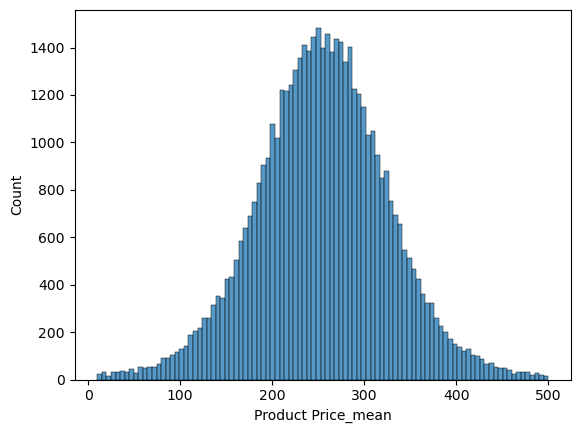

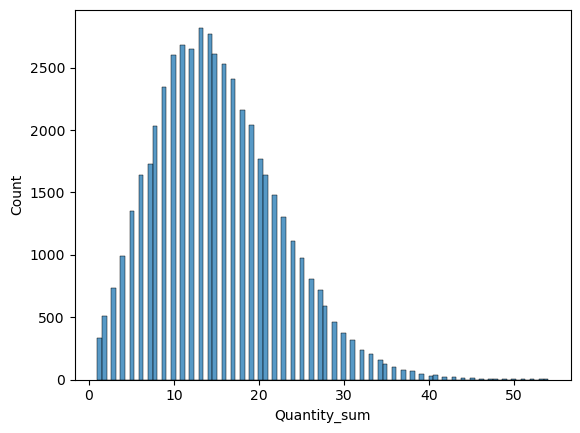

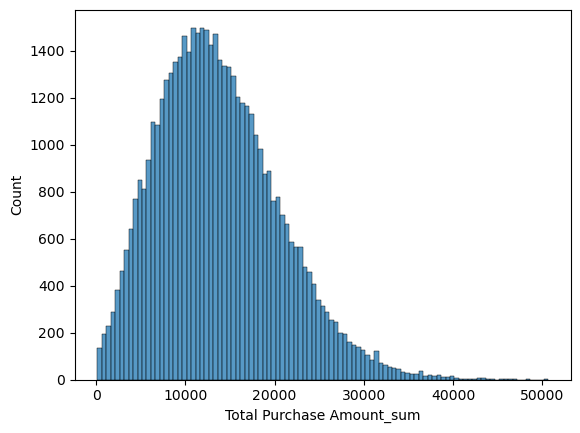

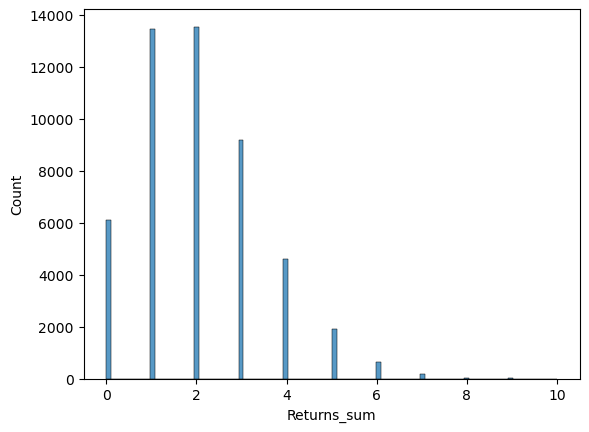

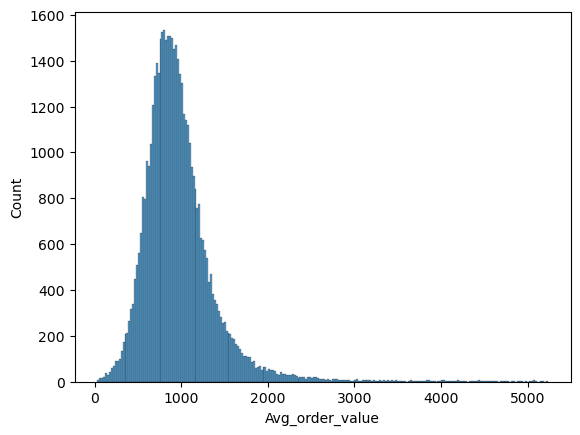

In [78]:
for i in num_col:
    sns.histplot(data=num_col,x=i)
    plt.show()

### Observation
### Features like Quantity_sum, Total Purchase Amount_sum, Returns_sum, and Avg_order_value are left-skewed, indicating most customers spend or buy in smaller quantities

In [ ]:
# Boxplot- to check mean median and outliers of numeric column

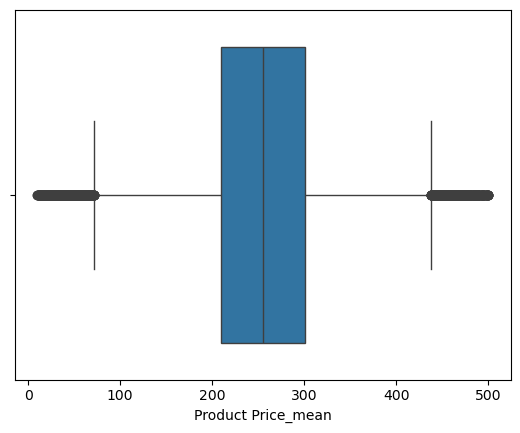

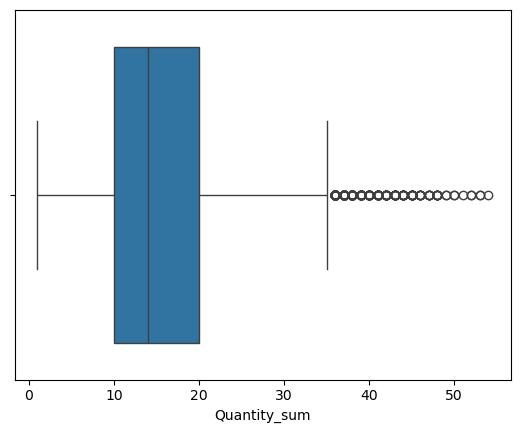

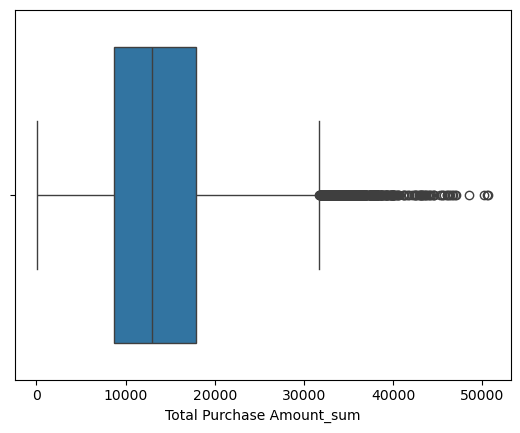

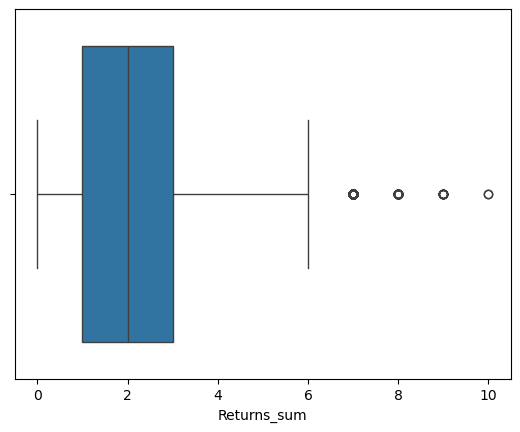

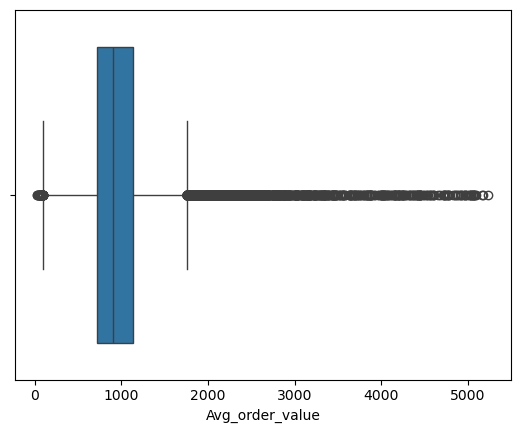

In [79]:
for i in num_col:
    sns.boxplot(data=num_col,x=i)
    plt.show()

### Observation
### Boxplots of numerical features such as product price_mean and quantity_sum show several outliers. However in a churn prediction context, these outliers may represent that customer who have high purchasing power are important for business context so not treating any outliers

In [ ]:
# Heatmap- to show how two categorical variable are related

In [90]:
check_for_corr=cust_df.select_dtypes('number')

In [91]:
num_corr=check_for_corr.corr()

<Axes: >

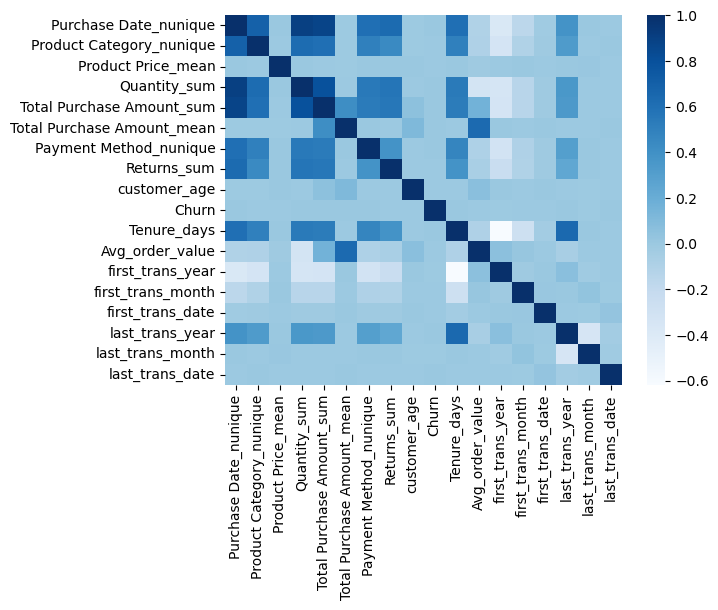

In [92]:
sns.heatmap(data=num_corr,cmap='Blues')

In [93]:
cust_df.columns

Index(['Purchase Date_min', 'Purchase Date_max', 'Purchase Date_nunique',
       'Product Category_nunique', 'Product Price_mean', 'Quantity_sum',
       'Total Purchase Amount_sum', 'Total Purchase Amount_mean',
       'Payment Method_nunique', 'Returns_sum', 'customer_age',
       'customer_gender', 'Churn', 'Tenure_days', 'Avg_order_value',
       'first_trans_year', 'first_trans_month', 'first_trans_date',
       'last_trans_year', 'last_trans_month', 'last_trans_date'],
      dtype='object')

In [97]:
cust_df.drop(columns=['Quantity_sum','Total Purchase Amount_sum'],inplace=True)

### Observation
### Purchase date_nunique show high multicollinearity with quantity_sum and total purchase amount_sum , so dropped both of them 

In [98]:
# Barplot/Countplot- to show the occurance of category data

In [99]:
cust_df.select_dtypes('object')

,customer_gender
Customer ID,
1,Female
2,Female
3,Male
4,Male
5,Female
...,...
49996,Female
49997,Male
49998,Female


In [103]:
cat_col=cust_df['customer_gender']

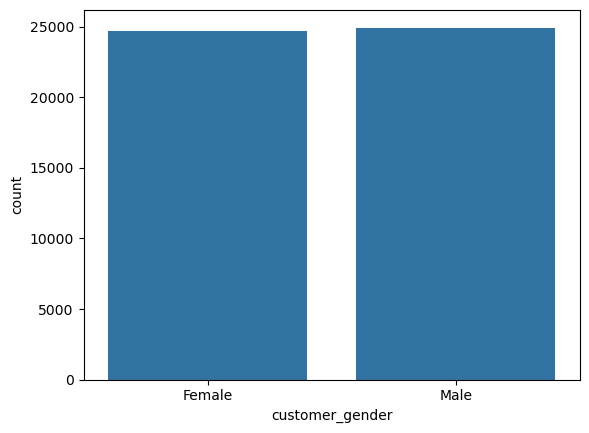

In [105]:
sns.countplot(data=cust_df,x=cat_col)
plt.show()

### Observation

#### Both male and female almost spend equally

In [106]:
cust_df.head(2)

,Purchase Date_min,Purchase Date_max,Purchase Date_nunique,Product Category_nunique,Product Price_mean,Total Purchase Amount_mean,Payment Method_nunique,Returns_sum,customer_age,customer_gender,Churn,Tenure_days,Avg_order_value,first_trans_year,first_trans_month,first_trans_date,last_trans_year,last_trans_month,last_trans_date
Customer ID,,,,,,,,,,,,,,,,,,,
1,2020-03-04 10:26:02,2022-11-29 06:48:25,3,3,373.333333,2096.666667,2,0.0,67,Female,0,999,419.333333,2020,3,4,2022,11,29
2,2020-07-31 16:27:41,2023-07-03 17:26:19,6,4,338.333333,2746.833333,3,4.0,42,Female,0,1067,915.611111,2020,7,31,2023,7,3


In [112]:
# 1 Average Churn by Gender

In [114]:
cust_df[['customer_gender', 'Churn']]\
    .groupby('customer_gender')\
    .mean()*100

,Churn
customer_gender,
Female,20.029133
Male,19.958312


In [ ]:
# 2 Average Tenure by Churn Status

In [115]:
cust_df[['Churn', 'Tenure_days']]\
    .groupby('Churn')\
    .mean()

,Tenure_days
Churn,
0,827.958799
1,830.103334


In [116]:
# 3 Avg. Order Value by Churn Status

In [117]:
cust_df[['Churn', 'Avg_order_value']]\
    .groupby('Churn')\
    .mean()

,Avg_order_value
Churn,
0,973.852664
1,974.402721


In [ ]:
# 4 Returns by Churn Status

In [118]:
cust_df[['Churn', 'Returns_sum']]\
    .groupby('Churn')\
    .mean()

,Returns_sum
Churn,
0,2.044599
1,2.038473


In [ ]:
# 5 Churn Rate by Payment Method Variety

In [128]:
cust_df[['Payment Method_nunique', 'Churn']]\
    .groupby('Payment Method_nunique')\
    .mean().sort_values(by='Churn',ascending=False)

,Churn
Payment Method_nunique,
1,0.203589
3,0.202175
2,0.195943


In [ ]:
# 6 Product Category Diversity by Churn Status

In [129]:
cust_df[['Churn', 'Product Category_nunique']]\
    .groupby('Churn')\
    .mean()

,Product Category_nunique
Churn,
0,2.87232
1,2.87038


In [ ]:
# 7 Avg Purchase Value by Gender

In [130]:
cust_df[['customer_gender', 'Avg_order_value']]\
    .groupby('customer_gender')\
    .mean()

,Avg_order_value
customer_gender,
Female,971.675572
Male,976.228347


## Final Summary of Insights

### **1 Gender and Churn**
### Female customers show a slightly higher churn rate compared to males, suggesting the need for retention strategies for females.

### 2 **Tenure and Churn**
### Churned and non-churned customers have almost identical tenure days indicating that churn is not significantly time-dependent in this dataset.

### 3 **Average Order Value and Churn**
### Churned and non-churned customers have almost identical average order values, showing no meaningful difference in spending behavior per item.

### 4 **Returns and Churn**
### Average number of returns is nearly the same across both groups suggesting returns are not a strong predictor of churn in this case.

### 5 **Unique Payment vs Churn**
### Customers who use only one payment method have a slightly higher churn rate indicating more the payment options higher the customer engagment

### 6 **Product Category vs Churn**
### Having different product category doesn't directly help in predicting churn and non churn customer

### 7 **Gender and Avg Order Value**
### Males spend slightly more per item than females on average


# Machine Learning - Churn Prediction

In [ ]:
## Predict the churn rate - Supervised Approach / Binary Classification 

In [133]:
cust_df

,Purchase Date_min,Purchase Date_max,Purchase Date_nunique,Product Category_nunique,Product Price_mean,Total Purchase Amount_mean,Payment Method_nunique,Returns_sum,customer_age,customer_gender,Churn,Tenure_days,Avg_order_value,first_trans_year,first_trans_month,first_trans_date,last_trans_year,last_trans_month,last_trans_date
Customer ID,,,,,,,,,,,,,,,,,,,
1,2020-03-04 10:26:02,2022-11-29 06:48:25,3,3,373.333333,2096.666667,2,0.0,67,Female,0,999,419.333333,2020,3,4,2022,11,29
2,2020-07-31 16:27:41,2023-07-03 17:26:19,6,4,338.333333,2746.833333,3,4.0,42,Female,0,1067,915.611111,2020,7,31,2023,7,3
3,2020-01-19 00:03:00,2023-02-03 03:58:07,4,3,222.750000,2355.750000,3,0.0,31,Male,0,1111,628.200000,2020,1,19,2023,2,3
4,2020-10-12 22:03:10,2022-06-29 03:41:09,5,4,243.000000,1565.200000,3,3.0,37,Male,0,624,411.894737,2020,10,12,2022,6,29
5,2020-04-08 21:57:19,2022-07-16 04:08:09,5,2,219.800000,1953.800000,3,3.0,24,Female,0,828,751.461538,2020,4,8,2022,7,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49996,2020-09-05 07:32:48,2022-09-19 00:20:18,7,3,220.428571,3433.428571,2,2.0,45,Female,0,743,961.360000,2020,9,5,2022,9,19
49997,2021-07-22 19:03:00,2022-08-21 12:46:16,2,2,199.000000,2857.000000,2,0.0,65,Male,0,394,714.250000,2021,7,22,2022,8,21
49998,2020-05-01 10:59:19,2023-08-31 11:32:30,10,3,254.200000,2049.500000,3,6.0,31,Female,1,1217,683.166667,2020,5,1,2023,8,31


## Label Encoding

In [134]:
cust_df.drop(columns=['Purchase Date_min','Purchase Date_max'],inplace=True)

In [139]:
cust_df.head()

,Purchase Date_nunique,Product Category_nunique,Product Price_mean,Total Purchase Amount_mean,Payment Method_nunique,Returns_sum,customer_age,customer_gender,Churn,Tenure_days,Avg_order_value,first_trans_year,first_trans_month,first_trans_date,last_trans_year,last_trans_month,last_trans_date
Customer ID,,,,,,,,,,,,,,,,,
1,3,3,373.333333,2096.666667,2,0.0,67,Female,0,999,419.333333,2020,3,4,2022,11,29
2,6,4,338.333333,2746.833333,3,4.0,42,Female,0,1067,915.611111,2020,7,31,2023,7,3
3,4,3,222.750000,2355.750000,3,0.0,31,Male,0,1111,628.200000,2020,1,19,2023,2,3
4,5,4,243.000000,1565.200000,3,3.0,37,Male,0,624,411.894737,2020,10,12,2022,6,29
5,5,2,219.800000,1953.800000,3,3.0,24,Female,0,828,751.461538,2020,4,8,2022,7,16


In [140]:
le = LabelEncoder()
cust_df['customer_gender'] = le.fit_transform(cust_df['customer_gender'])

In [141]:
cust_df.head()

,Purchase Date_nunique,Product Category_nunique,Product Price_mean,Total Purchase Amount_mean,Payment Method_nunique,Returns_sum,customer_age,customer_gender,Churn,Tenure_days,Avg_order_value,first_trans_year,first_trans_month,first_trans_date,last_trans_year,last_trans_month,last_trans_date
Customer ID,,,,,,,,,,,,,,,,,
1,3,3,373.333333,2096.666667,2,0.0,67,0,0,999,419.333333,2020,3,4,2022,11,29
2,6,4,338.333333,2746.833333,3,4.0,42,0,0,1067,915.611111,2020,7,31,2023,7,3
3,4,3,222.750000,2355.750000,3,0.0,31,1,0,1111,628.200000,2020,1,19,2023,2,3
4,5,4,243.000000,1565.200000,3,3.0,37,1,0,624,411.894737,2020,10,12,2022,6,29
5,5,2,219.800000,1953.800000,3,3.0,24,0,0,828,751.461538,2020,4,8,2022,7,16


In [142]:
le.classes_, sorted(cust_df['customer_gender'].unique())

(array(['Female', 'Male'], dtype=object), [0, 1])

In [ ]:
# checked what value assigned to which category

### Dropped purchase date_min and purchase date_max beacuse all features were already exctraced from them and only numeric datatype will go into model

## SMOTE 

In [143]:
cust_df['Churn']

Customer ID
1        0
2        0
3        0
4        0
5        0
        ..
49996    0
49997    0
49998    1
49999    0
50000    0
Name: Churn, Length: 49661, dtype: int64

In [146]:
cust_df['Churn'].value_counts()

Churn
0    39732
1     9929
Name: count, dtype: int64

In [147]:
# As data is highly unbalance to we use SMOTE to balance it 

In [148]:
X_for_SMOT=cust_df.drop('Churn',axis=1)

In [149]:
Y_for_SMOT=cust_df['Churn']

In [150]:
sm = SMOTE(sampling_strategy='minority')
X_new, Y_new = sm.fit_resample(X_for_SMOT,Y_for_SMOT)

In [151]:
Y_new.value_counts()

Churn
0    39732
1    39732
Name: count, dtype: int64

In [152]:
print("Before SMOTE:", Y_for_SMOT.value_counts())
print("After SMOTE:", Y_new.value_counts())

Before SMOTE: Churn
0    39732
1     9929
Name: count, dtype: int64
After SMOTE: Churn
0    39732
1    39732
Name: count, dtype: int64


### As our data(Churn column) was highly unbalanced so SMOTE was applied to oversample churners.
### This helped the model learn better from minority class and improved churn detection without losing original data.

## Standardisation

In [155]:
ss = StandardScaler()
X_ft = ss.fit_transform(X_new)
X_ft = pd.DataFrame(X_ft)
X_ft.columns = X_new.columns

In [157]:
X_ft.head()

,Purchase Date_nunique,Product Category_nunique,Product Price_mean,Total Purchase Amount_mean,Payment Method_nunique,Returns_sum,customer_age,customer_gender,Tenure_days,Avg_order_value,first_trans_year,first_trans_month,first_trans_date,last_trans_year,last_trans_month,last_trans_date
0,-0.900070,0.281244,1.721491,-0.866651,-0.552074,-1.535251,1.609353,-0.833741,0.507776,-1.296357,-0.477767,-0.655916,-1.366574,-0.579256,1.717555,1.642369
1,0.520496,1.460659,1.214031,0.021986,0.972619,1.462656,-0.116436,-0.833741,0.709640,-0.137405,-0.477767,0.630380,1.914463,0.768543,0.303494,-1.504923
2,-0.426548,0.281244,-0.461795,-0.512540,0.972619,-1.535251,-0.875783,1.199414,0.840257,-0.808593,-0.477767,-1.299063,0.456224,0.768543,-1.464083,-1.504923
3,0.046974,1.460659,-0.168193,-1.593051,0.972619,0.713179,-0.461593,1.199414,-0.605443,-1.313728,-0.477767,1.595102,-0.394415,-0.579256,-0.050022,1.642369
4,0.046974,-0.898172,-0.504567,-1.061919,0.972619,0.713179,-1.359004,-0.833741,0.000148,-0.520742,-0.477767,-0.334342,-0.880495,-0.579256,0.303494,0.068723


<Axes: >

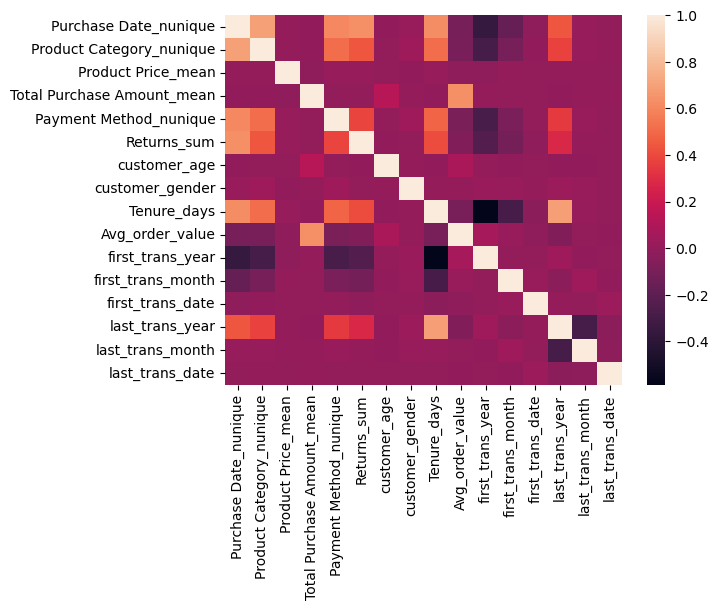

In [158]:
corr_mat = X_ft.corr()
sns.heatmap(corr_mat)

### Observation
### No features had a correlation above 0.8, so no strong multicollinearity was observed.  


## Feature Selection

In [195]:
# Wrapper method
model = LinearRegression()
rfe = RFE(estimator=model, n_features_to_select=16)
rfe.fit(X_new,Y_new)

RFE(estimator=LinearRegression(), n_features_to_select=16)

In [196]:
rfe_ranking = pd.DataFrame({'Features':X_new.columns, 'ranking':rfe.ranking_})
rfe_ranking.sort_values(by='ranking')

,Features,ranking
0,Purchase Date_nunique,1
1,Product Category_nunique,1
2,Product Price_mean,1
3,Total Purchase Amount_mean,1
4,Payment Method_nunique,1
5,Returns_sum,1
6,customer_age,1
7,customer_gender,1
8,Tenure_days,1
9,Avg_order_value,1


In [197]:
selected_features = rfe_ranking[rfe_ranking['ranking'] == 1]['Features'].tolist()

In [198]:
selected_features

['Purchase Date_nunique',
 'Product Category_nunique',
 'Product Price_mean',
 'Total Purchase Amount_mean',
 'Payment Method_nunique',
 'Returns_sum',
 'customer_age',
 'customer_gender',
 'Tenure_days',
 'Avg_order_value',
 'first_trans_year',
 'first_trans_month',
 'first_trans_date',
 'last_trans_year',
 'last_trans_month',
 'last_trans_date']

### Feature selection was performed using Recursive Feature Elimination (RFE), which selects top 16 best subset features by training and ranking them with a machine learning model.


## Train Test Data split

In [199]:
X_new.shape

(79464, 16)

In [200]:
X_train, X_test, y_train, y_test = train_test_split(X_new[selected_features], Y_new, test_size=0.2, random_state=1)

## Model Training 

In [201]:
# Logistic Regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

# Random Forest
rf_model = RandomForestClassifier(random_state=1)
rf_model.fit(X_train, y_train)


C:\Users\Avita\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


RandomForestClassifier(random_state=1)

## Prediction 

In [202]:
log_pred = log_model.predict(X_test)
rf_pred = rf_model.predict(X_test)

## Model Evaluation

In [203]:
print("Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, log_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, log_pred))
print("Classification Report:\n", classification_report(y_test, log_pred))

print("Random Forest Results:")
print("Accuracy:", accuracy_score(y_test, rf_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_pred))
print("Classification Report:\n", classification_report(y_test, rf_pred))


Logistic Regression Results:
Accuracy: 0.6142956018372868
Confusion Matrix:
 [[4761 3232]
 [2898 5002]]
Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.60      0.61      7993
           1       0.61      0.63      0.62      7900

    accuracy                           0.61     15893
   macro avg       0.61      0.61      0.61     15893
weighted avg       0.61      0.61      0.61     15893

Random Forest Results:
Accuracy: 0.8348329453218398
Confusion Matrix:
 [[7393  600]
 [2025 5875]]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.92      0.85      7993
           1       0.91      0.74      0.82      7900

    accuracy                           0.83     15893
   macro avg       0.85      0.83      0.83     15893
weighted avg       0.85      0.83      0.83     15893



# Summary
### After applying SMOTE to balance the dataset, both models significantly improved their ability to detect churners.

### - Logistic Regression achieved 61.4% accuracy with 63% recall for churners.
### - Random Forest outperformed with 83.4% accuracy and 74% recall.

### Based on overall balanced performance, Random Forest is selected as the final model.